---
# Examine effect of gender on Shark Tank deals
---

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
FS = 16
from genderize import Genderize

## Load the Shark Tank data

In [181]:
# df = pd.read_csv('./data/SharkTankDeals.csv').dropna(subset=['Valuation'])
df = pd.read_csv('./data/SharkTankDeals.csv').dropna(subset=['Entrepreneur Gender'])
df.rename(columns = {'Entrepreneur Gender':'gender'}, inplace = True)

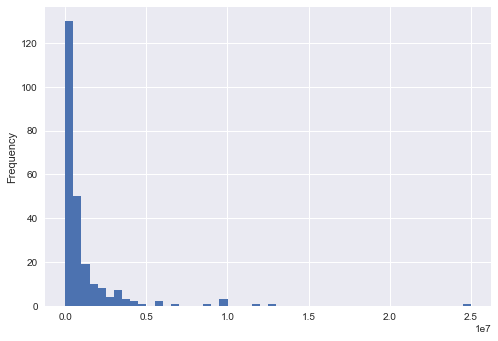

In [167]:
df['Valuation'] = [int(value.split('$',1)[-1].replace(',','')) for value in df.Valuation.values]
df.Valuation.plot.hist(50)

In [5]:
df = pd.read_csv('./data/Shark Tank Companies.csv').dropna(subset=['entrepreneurs'])
df.valuation = df.valuation/1e6

In [9]:
names = [name.split(',')[0].split(' ')[0] for name in df.entrepreneurs]

## Determine gender of entrepreneur based on first name

In [ ]:
# genders = [(item['name'], item['gender']) for item in Genderize().get(names) if item['probability']>0.8]
genders = [(item['name'], item['gender']) for item in Genderize().get(names)]
genders[:10]

In [11]:
# Add the genders to the dataframe
df['gender'] = [g[1] for g in genders]

In [184]:
print('Total male   entrepreneurs: {}'.format((df.gender=='Male').sum()))
print('Total female entrepreneurs: {}'.format((df.gender=='Female').sum()))

Total male   entrepreneurs: 295
Total female entrepreneurs: 125


### Relationship between gender and deal details

AttributeError: 'DataFrame' object has no attribute 'valuation'

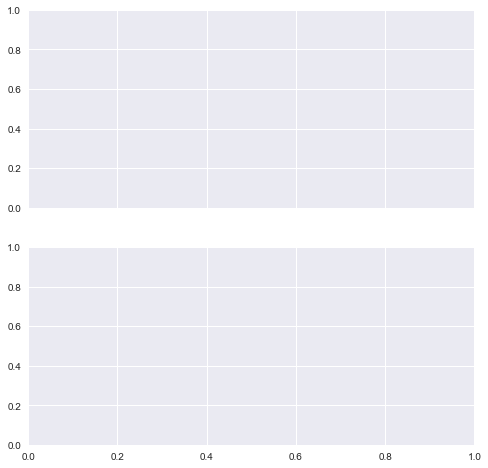

In [186]:
gender_labels = [('Male','b'), ('Female','r')]
fig, axs = plt.subplots(nrows=2, figsize=(8,8), sharex=True)
for ax,g in zip(axs,gender_labels):
    df.valuation[df.gender==g[0]].plot.hist(50, ax=ax, density=True, alpha=1, color=g[1])
    [ax.spines[s].set_visible(False) for s in ['right','top','left']]
#     ax.set_title(g[0] + ' entrepreneurs', fontsize=FS)    
    ax.set_xlabel('Evaluation (millions of $)', fontsize=FS-2)
    ax.set_ylabel('')    
    ax.set_yticklabels('')
    ax.set_yticks([])
    ax.set_xlim([0,10])
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FS)
    midx = np.mean(ax.get_xlim())
    topy = 0.9*np.max(ax.get_ylim())    
    ax.text(midx,topy,g[0] + ' entrepreneurs', fontsize=FS, horizontalalignment='center')

In [188]:
for gender in ['male','female']:
    percent_funded = ((df.gender==gender).values * df.deal.values).sum()/(df.gender==gender).sum()
    valuation = df.valuation[df.gender==gender].median()
    print('-'*30)
    print('Total {} entrepreneurs: {}'.format(gender, (df.gender==gender).sum()))
    print("{:.1f} % of {}s were funded.".format(100*percent_funded, gender))
    print("Median valuation of {} companies: ${:.2f} million".format(gender, valuation))
    print('\n')

AttributeError: 'DataFrame' object has no attribute 'deal'

In [241]:
sharks = ['Corcoran', 'Greiner', 'Cuban', 'Herjavec', 'John', "O'Leary", "Harrington"]
for shark in sharks:
    df[shark].fillna(0, inplace=True)

In [242]:
for shark in sharks:
    print('-'*30 + shark + '-'*30)        
    for gender in ['Male','Female']:
        num_gender = (df.gender==gender).sum()
        percent_funded = 100*df[shark][df.gender==gender].sum()/num_gender
        print("of the {num:.0f} {gender} entrepreneurs {shark} met, they funded {per:.1f}%.".format(
                num=num_gender, gender=gender, shark=shark, per=percent_funded))

------------------------------Corcoran------------------------------
of the 295 Male entrepreneurs Corcoran met, they funded 6.4%.
of the 125 Female entrepreneurs Corcoran met, they funded 19.2%.
------------------------------Greiner------------------------------
of the 295 Male entrepreneurs Greiner met, they funded 9.2%.
of the 125 Female entrepreneurs Greiner met, they funded 12.0%.
------------------------------Cuban------------------------------
of the 295 Male entrepreneurs Cuban met, they funded 14.6%.
of the 125 Female entrepreneurs Cuban met, they funded 16.0%.
------------------------------Herjavec------------------------------
of the 295 Male entrepreneurs Herjavec met, they funded 13.2%.
of the 125 Female entrepreneurs Herjavec met, they funded 5.6%.
------------------------------John------------------------------
of the 295 Male entrepreneurs John met, they funded 11.5%.
of the 125 Female entrepreneurs John met, they funded 12.0%.
------------------------------O'Leary-----

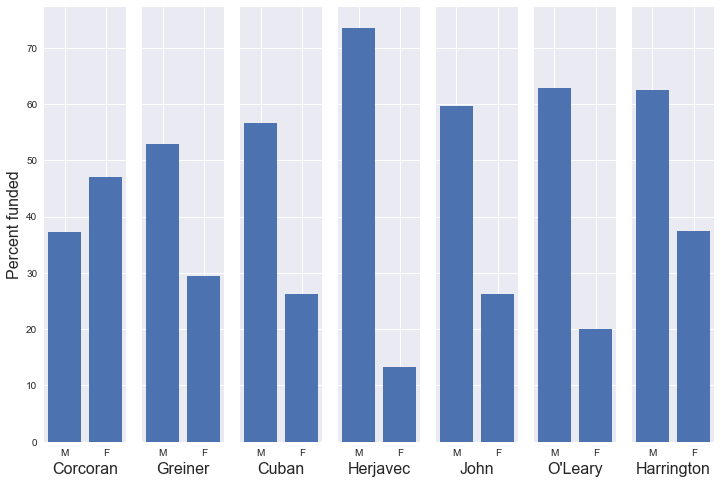

In [259]:
fig, axs = plt.subplots(ncols=len(sharks), sharey=True, figsize=(12,8))
for ax,shark in zip(axs,sharks):   
    percent_funded = []
    for n,gender in enumerate([('Male','b'),('Female','r')]):
        num_gender = (df.gender==gender[0]).sum()
#         percent_funded.append(100*df[shark][df.gender==gender[0]].sum()/num_gender)        
        percent_funded.append(100*((df.gender==gender[0]).values * df[shark].values).sum()/df[shark].sum())
        
    # Bar plot    
    ax.bar([0,1], percent_funded)
#     ax.set_facecolor(gender[1])
    if ax==axs[0]:
        ax.set_ylabel('Percent funded', fontsize=FS)
    ax.set_xticklabels(['','M','F'])
    ax.set_xlabel(shark, fontsize=FS)

In [222]:
for shark in sharks:
    print('-'*30 + shark + '-'*30)        
    for gender in ['Male','Female']:
        percent_funded = ((df.gender==gender).values * df[shark].values).sum()/df[shark].sum()
        print("Of the {num:.0f} entrepreneurs {shark} funded, {per:.1f} % were {gender}.".format(
            num=df[shark].sum(), shark=shark, per=100*percent_funded, gender=gender))

------------------------------Corcoran------------------------------
Of the 51 entrepreneurs Corcoran funded, 37.3 % were Male.
Of the 51 entrepreneurs Corcoran funded, 47.1 % were Female.
------------------------------Cuban------------------------------
Of the 76 entrepreneurs Cuban funded, 56.6 % were Male.
Of the 76 entrepreneurs Cuban funded, 26.3 % were Female.
------------------------------Greiner------------------------------
Of the 51 entrepreneurs Greiner funded, 52.9 % were Male.
Of the 51 entrepreneurs Greiner funded, 29.4 % were Female.
------------------------------Herjavec------------------------------
Of the 53 entrepreneurs Herjavec funded, 73.6 % were Male.
Of the 53 entrepreneurs Herjavec funded, 13.2 % were Female.
------------------------------John------------------------------
Of the 57 entrepreneurs John funded, 59.6 % were Male.
Of the 57 entrepreneurs John funded, 26.3 % were Female.
------------------------------O'Leary------------------------------
Of the 35 e

### Effect of requested valuation on success of deal

In [125]:
for deal in [True, False]:
    valuation = df.valuation[df.deal==deal].median()
    print('The median valuation where deal is {} is ${:.2f} million'.format(deal, valuation))

The median valuation where deal is True is $0.90 million
The median valuation where deal is False is $0.83 million
